# NAME :- Kartikeya Gupta
# Task 2:- Color Identification in Images

**Imports**

In [13]:
from sklearn.cluster import KMeans
import cv2
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
%matplotlib inline

**Load Test Image**

In [14]:
try:
    img = cv2.imread("test_images/test_image_1.jpeg")
    print("Image Loaded...")
except:
    print("Image not Found!")

Image Loaded...


**Display Test Image**

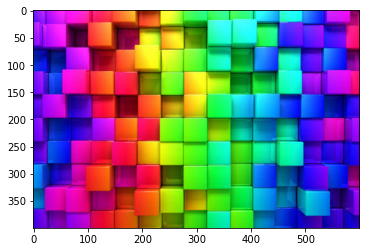

In [15]:
plt.imshow(img)
plt.show()

## Image Conversions

**Convert Image from BGR to RGB**

In [16]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

**Image Rescaling**

In [17]:
img = cv2.resize(img, (600, 400), interpolation=cv2.INTER_AREA)

**RGB to GRAY Conversion**

In [18]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

**Display Converted Image**

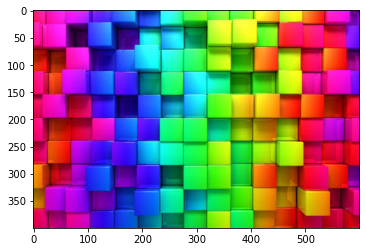

In [19]:
plt.imshow(img)
plt.show()

## Extract Color From Converted Image

**Reshape Image Array**

In [20]:
reshaped_img = img.reshape(img.shape[0]*img.shape[1], 3)

**Define Color Clusters**

In [21]:
color_clusters = KMeans(n_clusters = 10)

**Label Extracted Colors**

In [22]:
labels = color_clusters.fit_predict(reshaped_img)

**Store Color Matrix**

In [23]:
counts = Counter(labels)
center_colors = color_clusters.cluster_centers_

**Reorder Identified Colors**

In [24]:
ordered_colors = [center_colors[i]/255 for i in counts.keys()]

**Convert Color values to HEX**

In [25]:
hex_colors = ["#{:02x}{:02x}{:02x}".format(int(ordered_colors[i][0]*255), int(ordered_colors[i][1]*255), int(ordered_colors[i][2]*255)) for i in counts.keys()]

**Convert Color Values to RGB**

In [26]:
rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]

## Final Output

**Extracted Colors In RGB Format**

In [27]:
count = 1
for clrs in list(rgb_colors):
    red = int(clrs[0])
    green = int(clrs[1])
    blue = int(clrs[2])
    print(f"[Color {count}] = ({red}, {green}, {blue})")
    count += 1

[Color 1] = (49, 51, 237)
[Color 2] = (219, 104, 11)
[Color 3] = (41, 234, 65)
[Color 4] = (188, 232, 22)
[Color 5] = (146, 20, 21)
[Color 6] = (46, 14, 128)
[Color 7] = (25, 129, 49)
[Color 8] = (213, 14, 205)
[Color 9] = (228, 12, 75)
[Color 10] = (25, 215, 212)


**Extracted Colors in HEX Format**

In [28]:
count = 1
for clrs in list(hex_colors):
    print(f"[Color {count}] = {clrs}")
    count += 1

[Color 1] = #3133ed
[Color 2] = #db680b
[Color 3] = #29ea41
[Color 4] = #bce816
[Color 5] = #921415
[Color 6] = #2e0e80
[Color 7] = #198131
[Color 8] = #d50ecd
[Color 9] = #e40c4b
[Color 10] = #19d7d4


**Pie Chart of Extracted Colors**

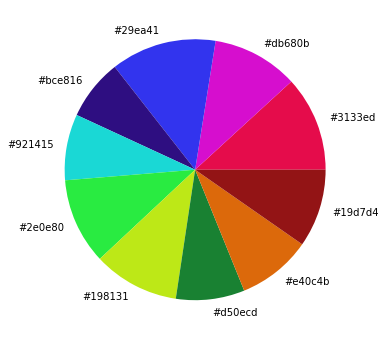

In [29]:
plt.figure(figsize = (10, 6))
plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
plt.show()